<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset iris\
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])

In [62]:
print(df_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [63]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [49]:
print(df_target.head())

   species
0        0
1        0
2        0
3        0
4        0


In [18]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()
df_target_categorical1 = df_target.copy()
df_target_categorical2 = df_target.copy()

In [51]:
df_target_categorical.head(3)

,species
0,0
1,0
2,0


In [52]:
df_target_categorical.describe()

,species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [53]:
df_target_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   species  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [ ]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

# Tip:
# df_target_categorical['species'] = df_target.apply(lambda...... 

In [70]:
df_target_categorical['species'].unique()

array([0, 1, 2])

In [ ]:
#haciendo trampa, alternatica con reeplace (este caso se puede hacer todo en la misma linea?))

In [4]:
df_target_categorical['species'] = df_target_categorical['species'].replace(0, 'setosa')
df_target_categorical['species'] = df_target_categorical['species'].replace(1, 'versicolor')
df_target_categorical['species'] = df_target_categorical['species'].replace(2, ' ')

In [5]:
df_target_categorical['species'].unique()

array(['setosa', 'versicolor', ' '], dtype=object)

In [6]:
#otra manera ( este caso se puede hacer todo en la misma linea?)

In [7]:
df_target_categorical1['species'].loc[(df_target_categorical1['species'] == 0)] = 'setosa'
df_target_categorical1['species'].loc[(df_target_categorical1['species'] == 1)] = 'versicolor'
df_target_categorical1['species'].loc[(df_target_categorical1['species'] == 2)] = 'virginica'
df_target_categorical1['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# con lambda es donde tengo incovenientes en aplicar la funcion.
# Si aplico esta alternativa, me reemplaza con true y false. Por lo tanto pierdo un dato. En este caso tengo 3 alternativas()

# la segunda alternativa es decribir todos los casos, pero al usar true and false caigo en el mismo error

In [8]:
df_target_categorical2['species'].unique()

array([0, 1, 2])

In [13]:
df_target_categorical2['species'] = df_target_categorical2['species'].apply(lambda x: setosa if x == 0 else False)
df_target_categorical2['species'].unique()

NameError: ignored

In [17]:
# aca solo logro identificar setosa el resto las pierdo
df_target_categorical2['species1'] = df_target_categorical2['species'].apply(lambda x: "setosa" if x== 0 else None)
df_target_categorical2['species1'].unique()

array(['setosa', None], dtype=object)

In [20]:
df_target_categorical2['species'] = df_target_categorical2.apply(lambda x: "setosa"     if x['species'] == 0 or
                                                                           "versicolor" if x['species'] == 1 or
                                                                           "virginica"  if x['species'] == 2 else None, axis=1)
df_target_categorical2['species']

SyntaxError: ignored

In [23]:
df_target_categorical2['species'] = df_target_categorical2.apply(lambda x: "setosa"     if x == 0 
                                                                           "versicolor" else x == 1 
                                                                           "virginica"  else x == 2 else None, axis=1)
df_target_categorical2['species']

SyntaxError: ignored

In [78]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio
df_target_categorical.head()

,species
0,0
1,0
2,0
3,0
4,0


In [79]:
df_target_categorical1.head()

,species
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical

In [14]:
df_target_categorical.value_counts()

species
True       150
dtype: int64

In [15]:
# Concatenar ambos dataset
df = pd.concat([df_data, df_target_categorical], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True


In [17]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data"


In [26]:
df_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [24]:
#una forma de revisar nan
df_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to Nan
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  151 non-null    float64
 1   sepal width (cm)   151 non-null    float64
 2   petal length (cm)  151 non-null    float64
 3   petal width (cm)   151 non-null    float64
dtypes: float64(4)
memory usage: 10.0+ KB


In [30]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,151.000000,151.000000,151.000000,151.000000
mean,5.804636,3.037086,3.733113,1.191391
std,0.952494,0.500615,1.785785,0.765936
min,0.000000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
# print(....)


In [28]:
print(df_data.shape)

(151, 4)


In [29]:
df_data.shape

(151, 4)

In [31]:
##hay 150 filas y 4 columnas

# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

In [31]:
# Alumno, separe el dataset "df" en un dataset por tipo de iris
# df_setosa = ...
# df_versicolor = ...
# df_verginica = ...

In [37]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [39]:
df['species'].unique()

array([ True])

In [41]:
df_setosa = df[df['species'] == 'True']
print('Cantidad de datos en observacion:', df_setosa.shape[0])

Cantidad de datos en observacion: 0


In [ ]:
df_versicolor = df[df['species'] == 'True']
print('Cantidad de datos en observacion:', df_versicolor.shape[0])

In [ ]:
df_verginica = df[df['species'] == 'True']
print('Cantidad de datos en observacion:', df_verginica.shape[0])

In [ ]:
# Almuno: Realizar una función que reciba un dataframe como parámetro y grafique
# la relación (scatter plot) entre "petal length (cm)" (x) y "petal width (cm)" (y) de la especie setosa

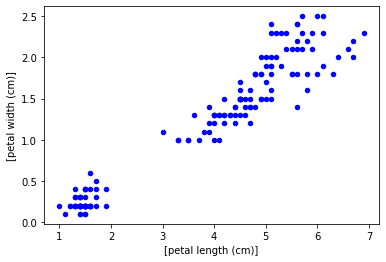

In [43]:
df.plot.scatter(x=['petal length (cm)'], y=['petal width (cm)'], color='b')
plt.show()

In [ ]:
# Almuno: Utilizar la función generada para graficar la relación con dada dataframe de cada especie